# Python Assignment - ALN

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import numpy as np

### Question 1:

#### Here is the script from Dr. X, where they first define the function get_sequence_from_file to get sequences from a fasta file without extraneous info. Next, they created a for-loop to parse out the required information. Within that for-loop, they split the string for description up, in that for each record, the data is added to a string array, as there will be multiple descriptions used. Then they defined the species name as the first word description + a space + the second word description. Finally, they created a dictionary for the species names that matches to the recorded sequence. Then the function should return with a dictionary of the species name plus every FASTA record. 

In [2]:
def get_sequences_from_file(fasta_fn):                                 # All lines in this section were provided by Dr. X.
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

#### So for the return types, by defining the sequence data dict, we explicitly request three pieces of information. We parse the sequence and then add 2 descriptions..  So because the sequence_data_dict would initially only have the sequence info because of parse, I have to add the species name to the dictionary to match it with the record. Otherwise, I would only get the sequences and no matching records.

#### Outputs could vary depending on how the fasta file is arranged. If species name is not the first and second description, then that would need to be altered. So arrangement of fasta file is important for output.

#### Using the function defined above, I translate the fasta sequence into a readable file and read the data file for the penguin info. Then I review both the penguins file, the cytb_seqs file and species list. The code for the cytb_seqs, penguins_df, and species_list were provided by Dr. X. 

In [3]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")         # These first two lines and the last line were provided
pd.read_csv("penguins_mass.csv")                                   # by Dr. X.
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)

In [4]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [5]:
cytb_seqs

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

In [6]:
species_list

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

### Question 2:
#### Next I work on the String translate function. First, I used the code provided from Dr. X to define the codon table and print to view the table matrix.

In [7]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]          # Code provided by Dr. X.

In [8]:
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

#### Then, using the pseudocode provided, I complete a translate function to convert the sequence of DNA to amino acids. First I used the initial def line provided by Dr. X to define the function that we're completing as well as his mito_table to indicate what table I will use for the corresponding to. I create my code for a for-loop with a range for the length of the sequence, for every three nucleotides, to compare a triplet of sequences to the codon table. Then it returns the amino acid. 

Source for code completion: https://stackoverflow.com/questions/36305314/how-to-translate-a-fasta-sequence-from-dict-how-to-make-function-output-a-strin, http://www.onlamp.com/pub/a/python/2002/10/17/biopython.html?page=3 and http://www.petercollingridge.co.uk/python-bioinformatics-tools/codon-table

In [9]:
def translate_function(string_nucleotides):                                     # These first two lines were provided by Dr. X.
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  
    aa_string = ""                                                              # This is the start of my code.
    for x in range (0,len(string_nucleotides)-3, 3):
        codon = string_nucleotides[x:x+3]
        aa_string = aa_string + mito_table.forward_table[codon]
    return(aa_string)

#### Now to test the function, I print the species list and randomly pick a species. I print out the DNA sequence and run it through the translation function and compare the AA to the codon table printed above to make sure it matches.

In [10]:
species_list

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

In [11]:
print(cytb_seqs['Aptenodytes patagonicus'])

ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCA

In [12]:
translate_function('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA')

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH'

### Question 3:

#### Now we create the alternative translate function. To do this I used the .translate() function from Biopython. First I import the Seq and Translate functions. Then I create a for-loop to translate (using the .translate function), where I used the key-value pair to compare the DNA sequence in the dictionary cytb_seq to AA in the codon table.I also used the to_stop to remove the stop codon. Then I used the same DNA sequence that I tested in the first function to test the alternative translation function.

Source for this code: http://biopython.org/DIST/docs/api/Bio.Seq.Seq-class.html#translate and http://biopython.org/DIST/docs/api/Bio.Seq.Seq-class.html#translate

In [13]:
from Bio.Seq import Seq
from Bio.Seq import translate

In [14]:
def alternative_translate(dict):
    for key, value in cytb_seqs.items():
        aa_string = value.translate(to_stop=True, table="Vertebrate Mitochondrial")
    return(aa_string)

In [15]:
alternative_translate("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH', ExtendedIUPACProtein())

### Question 4:

#### Now I conduct an amino acid analysis. Again using Biopython, I imported the ProtParam module to calculate the molecular weight. I altered the code found on the source below to get the function, as well as using Dr. X's initial pseudocode:

Source: http://biopython.org/wiki/ProtParam

In [16]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis                          # These first two lines were provided by Dr. X.
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)                                  # This is the start of my code. 
    return (analysed_seq.molecular_weight())

In [17]:
compute_molecular_weight("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

100610.413400002

### Question 5:

#### Next, I conduct a GC content analysis. This time, I explicitly imported the GC module as that was already defined on Biopython. This information was provided by Dr. Iddo Friedberg during the class BCB546X at Iowa State University. I did review the BioUtils source for more information on context.

Source: http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html#GC

In [18]:
from Bio.SeqUtils import GC
GC("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

49.69378827646544

### Question 6:

#### We add two new columns to the penguin data frame for molecular weight and GC Content. I used the comments from the the source listed below to get the code for adding columns. Then used the .assign() function to assign NaN to the empty cells as that data is not yet calculated.

Source: https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas

In [19]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [20]:
penguins_df.assign(mol_weight = "NaN", GC_cont = "NaN")

,species,mass,GC_cont,mol_weight
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


### Question 7

#### Next I write for loop to transate each sequence, calculate the molecular weight, and compute GC for each translated sequence. I first set the row counter at 0 as this is a 0-index program, then created a for-loop for this function. I used the key-value pairing dictionary function mentioned above (and also provided by Dr. X). Also, I used the translate_function I defined in question 2, and the molecular weight and GC functions defined in questions 4 and 5.  I couldn't append data for more then one row, so I used .set_value to insert the values as listed.

Source: https://stackoverflow.com/questions/28910089/filling-empty-python-dataframe-using-loops and https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe

In [21]:
row_counter = 0
for key, value in cytb_seqs.items():                                          # These two lines of code provided by Dr. X.
    aa_string = translate_function(str(value))                                # Used base from Dr. X., altered function
    mol_weight_table = compute_molecular_weight(aa_string)                    # From this line forward, this is my code.
    GC_cont_table = GC(str(value))
    penguins_df.set_value(row_counter, 'GC_cont', GC_cont_table)                    
    penguins_df.set_value(row_counter, 'mol_weight', mol_weight_table)
    row_counter = row_counter + 1

In [22]:
penguins_df

,species,mass,GC_cont,mol_weight
0,Aptenodytes forsteri,28.00,48.381452,42459.6021
1,Aptenodytes patagonicus,13.40,49.693788,42563.7067
2,Eudyptes chrysocome,2.80,51.181102,42475.5753
3,Eudyptes chrysolophus,4.50,50.918635,42445.5493
4,Eudyptes sclateri,4.25,50.831146,42475.5753
5,Eudyptula minor,1.60,49.256343,42491.6408
6,Pygoscelis adeliae,4.60,49.081365,42458.6140
7,Pygoscelis antarctica,4.10,47.769029,42404.5423
8,Pygoscelis papua,6.10,47.156605,42595.8759
9,Spheniscus demersus,3.20,48.293963,42431.5490


### Question 8

#### I plotted a bar chart of mass with the x-axis labeled with species names. For this I used the class notes and imported seaborn and used matplotlib to see the plots inline. As the labels on the x-axis was crowded, I rotated the label 90 so that they would be readable and still remain with appropriate bar. 

Source:https://seaborn.pydata.org/generated/seaborn.barplot.html and https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

In [23]:
import seaborn as sns
%matplotlib inline

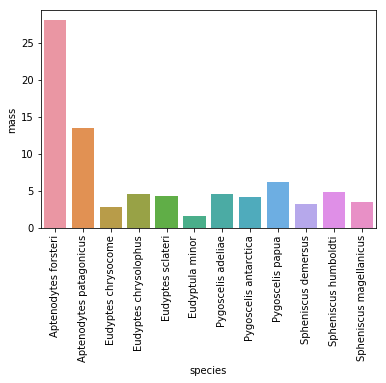

In [24]:
Species_by_mass = sns.barplot("species", "mass", data=penguins_df)
Species_by_mass.set_xticklabels(Species_by_mass.get_xticklabels(), rotation=90)

#### To answer the questions in question 8, the smallest penguin is the Eudyptula minor. Another interesting fact is that they are called the fairy penguin due to their size, or the little blue penguin because of their blue plumage.

Source: https://en.wikipedia.org/wiki/Little_penguin

### Question 9

#### I used a scatterplot to plot a visualization of the molecular weight (y-axis) as a function of GC content (x-axis). For this, I also used class notes as opposed to a website for coding information.

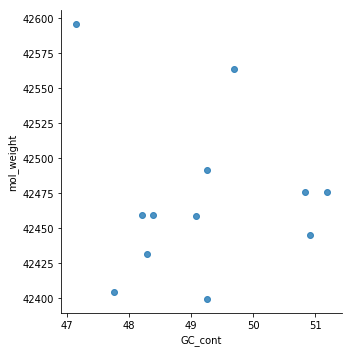

In [25]:
sns.lmplot("GC_cont", "mol_weight", data=penguins_df, fit_reg = False)

### Question 10

#### I then saved the new dataframe to a new file.

Source: https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file

In [26]:
penguins_df.to_csv("penguins_mass_cytb.csv")

### Question 11: Bonus

#### I added one additional function and created three more plots for the dataset in Python. Using Biopython, I altered my alternative translation function to a transcribe function to go from DNA to RNA. Then used the DNA sequence from question 2 to test it.  Then I created a bar plot to visualize GC content as a function of species and molecular weight as a function of species.  I also created a scatter plot to examine mass as a function of GC content and mass as a function of molecular weight. As these were variations of plots conducted  in questions 8 and 9, I just altered the source for the values of x and y.

In [27]:
def transcribe(dict):
    for key, value in cytb_seqs.items():
        aa_string = value.transcribe()
    return dict.replace('T','U')

In [28]:
transcribe("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

'AUGGCCCCAAACCUCCGAAAAUCCCAUCCUCUCCUAAAAAUAAUUAAUAACUCCCUAAUCGACCUGCCCACCCCAUCAAACAUCUCUGCCUGAUGAAACUUCGGAUCUCUCCUAGGCAUCUGCCUAACUACACAAAUCUUAACCGGCCUCCUACUAGCUAUACACUACACUGCAGACACAACCCUGGCCUUCUCCUCAGUCGCCCACACAUGCCGAAAUGUACAGUACGGCUGACUAAUCCGCAACCUACAUGCAAACGGAGCAUCAUUCUUUUUCAUCUGCAUCUACCUCCACAUCGGCCGUGGAUUUUACUACGGCUCCUACCUAUACAAAGAAACCUGAAACACGGGCAUCAUUCUCCUACUCACACUCAUAGCAACCGCCUUCGUAGGCUACGUCCUGCCAUGGGGACAAAUAUCAUUCUGAGGGGCCACAGUCAUUACCAACUUAUUCUCAGCCAUCCCCUACAUCGGCCAAACCCUCGUAGAAUGAGCCUGAGGUGGCUUUUCAGUAGACAACCCCACAUUAACCCGAUUUUUCGCACUACACUUCCUCCUCCCCUUCAUAAUCGCAGGCCUCACCCUCAUCCAUCUCACCUUCCUCCACGAAUCAGGCUCAAACAACCCACUGGGCAUCGUAGCUAACUCCGAUAAGAUCCCAUUCCAUCCCUACUACUCCACAAAAGACACCCUAGGAUUCGCACUCAUACUUCUCCCACUAACAACCCUCGCCCUAUUCUCCCCCAACUUACUGGGGGACCCAGAAAACUUUACCCCAGCAAACCCACUAGUCACACCCCCACACAUCAAACCAGAAUGAUACUUCCUAUUUGCAUACGCUAUCCUACGCUCAAUCCCCAACAAACUGGGGGGAGUCCUAGCCCUAGCAGCCUCAGUACUGAUCCUAUUCCUAAUCCCCCUCCUCCACAAGUCCAAACAGCGUACAAUAACCUUCCGUCCCCUCUCCCAGCUCCUAUUCUGAACCUUAGUAGCCAACCUC

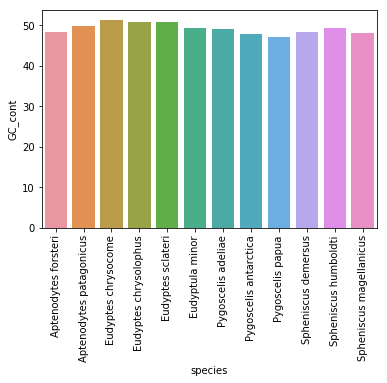

In [29]:
Species_by_GC = sns.barplot("species", "GC_cont", data=penguins_df)
Species_by_GC.set_xticklabels(Species_by_GC.get_xticklabels(), rotation=90)

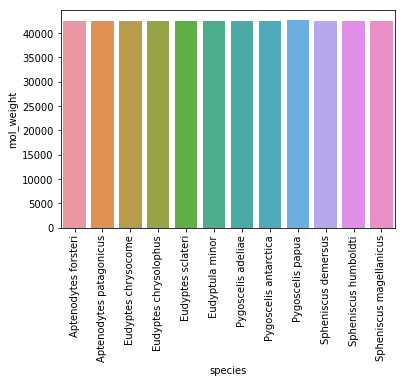

In [30]:
Species_by_MW = sns.barplot("species", "mol_weight", data=penguins_df)
Species_by_MW.set_xticklabels(Species_by_MW.get_xticklabels(), rotation=90)

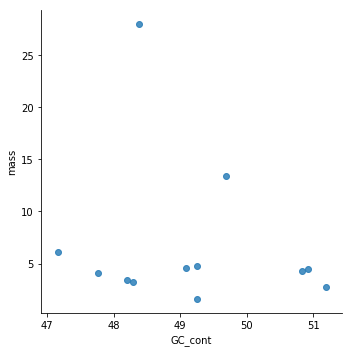

In [31]:
sns.lmplot("GC_cont", "mass", data=penguins_df, fit_reg = False)

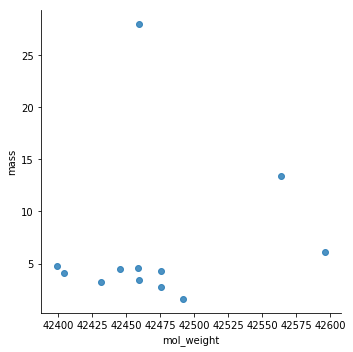

In [32]:
sns.lmplot("mol_weight", "mass", data=penguins_df, fit_reg = False)